## Investigating ARM Radars


## Overview
   
Within this notebook, we will cover:

1. General structure of radar data
1. Radar Scanning
1. Look at various ARM radars
1. Do a simple analysis 

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Helpful | Basic features |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Basic plotting |
| [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) | Helpful | Basic arrays |

- **Time to learn**: 45 minutes
---

In [32]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

import pyart
from pyart.testing import get_test_data
import xradar as xd
import numpy as np

warnings.filterwarnings("ignore")

We will use Py-ART to investigate data. This is not a Py-ART tutorial. Also this notebook is limited to moment data and will not cover lower level data such as doppler spectra. 

## ARM Radars

ARM's main radars can be broken down into two categories: Scanning and zenith pointing. ARM operates radars at four requency bands: W, Ka, X and C band. ARM denotes radars as either cloud or precipitation sensing. W and Ka are only denoted as cloud sensing, X is both and C is only precipitation sensing. The radars are the Marine W-Band ARM Cloud Radar (M-WACR), Ka band Zenith Radar (Ka-ZR), Ka band ARM Scanning Cloud Radar (Ka-SACR), X band Scanning ARM Radar (X-SACR), X band Scanning ARM Precipition Radar (X-SAPR) and C band Scanning ARM Precipitation Radar (C-SAPR). The notation pertain more to the operation and suitability of the radar (eg there is nothing stopping a user using KAZR to study Precipitation). 


BNF has a C-SAPR, X-SACR, Ka-SACR and a KaZR. 

![alt text](remotesensing-16-02630-g002.png "Title")


From: Ueki, A.; Teshiba, M.S.; Schvartzman, D.; Kirstetter, P.-E.; Palmer, R.D.; Osa, K.; Yu, T.-Y.; Cheong, B.; Bodine, D.J. Winter Precipitation Detection Using C- and X-Band Radar Measurements. Remote Sens. 2024, 16, 2630. https://doi.org/10.3390/rs16142630

In [9]:
kazr = pyart.io.read('bnfkazr2cfrgeM1.a1.20250422.000001.nc')

In [10]:
kazr.info()

altitude:
	data: <ndarray of type: float32 and shape: (1,)>
	long_name: Altitude
	units: m
	standard_name: altitude
	_FillValue: -9999.0
altitude_agl:
	data: <ndarray of type: float32 and shape: (1,)>
	long_name: Altitude above ground level
	units: m
	standard_name: height
	_FillValue: -9999.0
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (1395,)>
	long_name: Azimuth angle from true north
	units: degree
	standard_name: sensor_to_target_azimuth_angle
	axis: radial_azimuth_coordinate
	_FillValue: -9999.0
elevation:
	data: <ndarray of type: float32 and shape: (1395,)>
	long_name: Elevation angle from horizontal plane
	units: degree
	standard_name: sensor_to_target_elevation_angle
	axis: radial_elevation_coordinate
	_FillValue: -9999.0
fields:
	co_to_crosspol_correlation_coeff:
		data: <ndarray of type: float32 and shape: (1395, 557)>
		long_name: Copolar to cross-polar correlation coefficient (also known as rhoxh)
		units: 1
		coordinates: elevation azimuth

In [11]:
kazr.fields['reflectivity']

{'long_name': 'Equivalent reflectivity factor',
 'units': 'dBZ',
 'coordinates': 'elevation azimuth range',
 'standard_name': 'equivalent_reflectivity_factor',
 '_FillValue': np.int16(-32767),
 'data': masked_array(
   data=[[-56.393829345703125, -38.053550720214844, -27.32828712463379,
          ..., -23.09758186340332, -21.871326446533203,
          -23.74512481689453],
         [-54.41040802001953, -38.476749420166016, -10.163276672363281,
          ..., -22.741943359375, -25.28877830505371, -25.115421295166016],
         [-62.964866638183594, -40.989166259765625, -36.52391815185547,
          ..., -24.229509353637695, -21.775726318359375,
          -22.355710983276367],
         ...,
         [-54.46394348144531, -25.560287475585938, -23.070812225341797,
          ..., -21.877700805664062, -24.50994110107422,
          -22.57240867614746],
         [-63.29883575439453, -38.238380432128906, -37.089881896972656,
          ..., -24.619564056396484, -22.373558044433594,
          -23.1

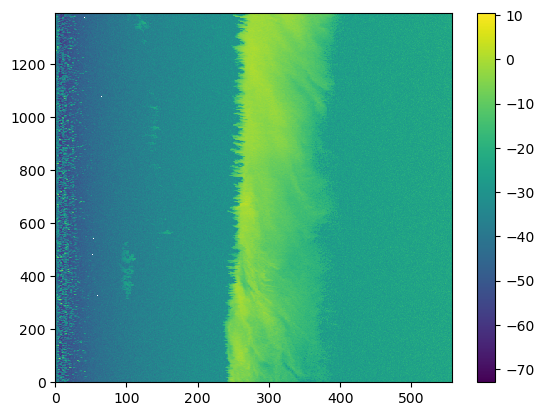

In [13]:
plt.pcolormesh(kazr.fields['reflectivity']['data'])
plt.colorbar()

In [14]:
kasacr = pyart.io.read('bnfkasacrcfrS4.a1.20250422.000001.nc')

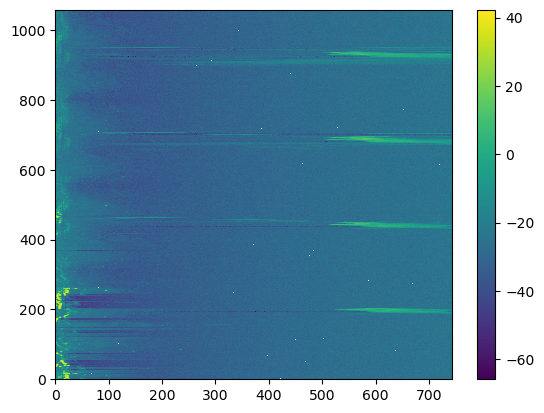

In [15]:
plt.pcolormesh(kasacr.fields['reflectivity']['data'])
plt.colorbar()

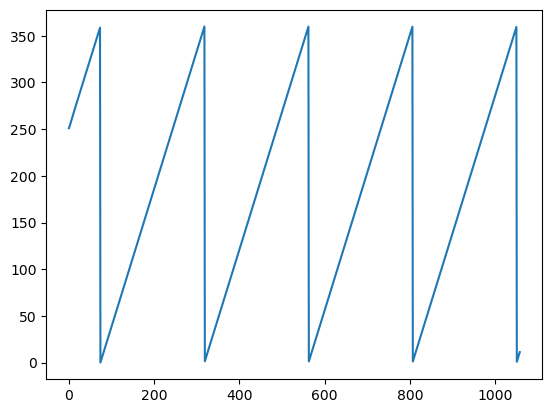

In [21]:
plt.plot(kasacr.azimuth['data'])

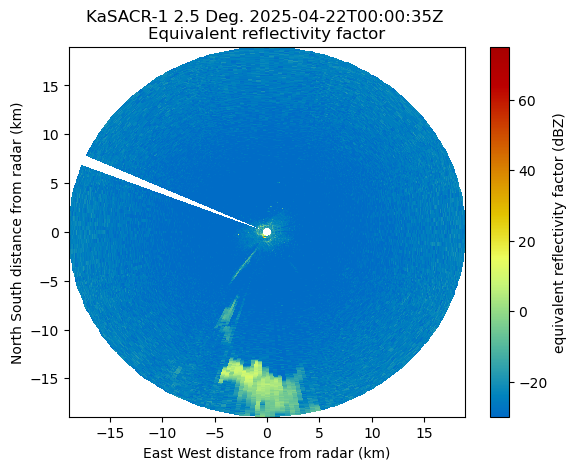

In [22]:
myd = pyart.graph.RadarDisplay(kasacr)
myd.plot_ppi('reflectivity')

In [23]:
csapr = pyart.io.read('bnfcsapr2cfrS3.a1.20250422.000000.nc')

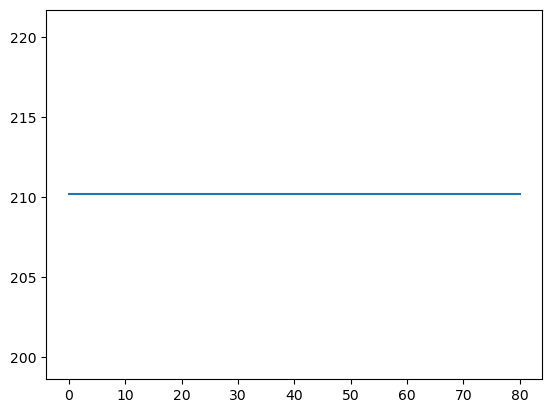

In [24]:
plt.plot(csapr.azimuth['data'])

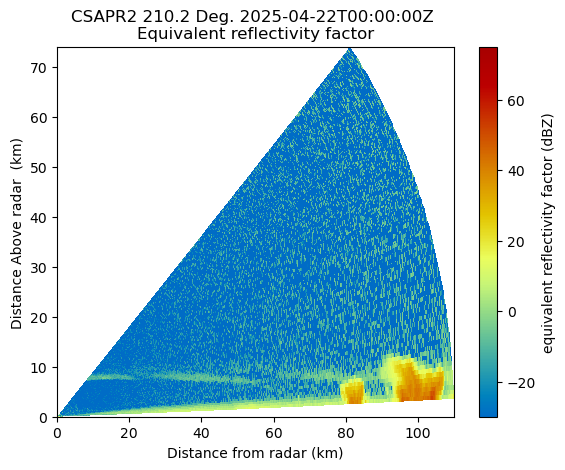

In [26]:
mydc = pyart.graph.RadarDisplay(csapr)
mydc.plot_rhi('reflectivity')

In [55]:
alt = kazr.gate_z['data']
dbz = kazr.fields['reflectivity']['data']

In [120]:
freq, height_edges, field_edges = np.histogram2d(
        alt.data.flatten(),
        dbz.data.flatten(), 
        bins = [np.linspace(0,15000,99), np.linspace(-60., 0., 39)])
      

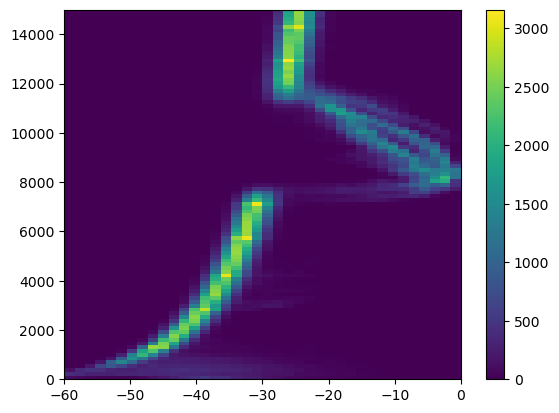

In [121]:
X, Y = np.meshgrid(height_edges, field_edges)
plt.pcolormesh(Y, X, freq.transpose())
plt.colorbar()


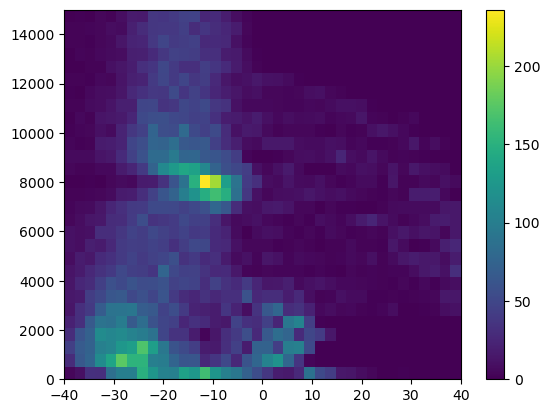

In [126]:
alt = csapr.gate_z['data']
dbz = csapr.fields['reflectivity']['data']
freq, height_edges, field_edges = np.histogram2d(
        alt.data.flatten(),
        dbz.data.flatten(), 
        bins = [np.linspace(0,15000,30), np.linspace(-40., 40., 39)])

X, Y = np.meshgrid(height_edges, field_edges)
plt.pcolormesh(Y, X, freq.transpose())
plt.colorbar()


In [72]:
f, one, two = np.histogram2d(np.random.gamma([1395,557]), np.random.gamma([100,100]))

In [64]:
np.random.gamma?

Signature: np.random.gamma(shape, scale=1.0, size=None)
Docstring:
gamma(shape, scale=1.0, size=None)

Draw samples from a Gamma distribution.

Samples are drawn from a Gamma distribution with specified parameters,
`shape` (sometimes designated "k") and `scale` (sometimes designated
"theta"), where both parameters are > 0.

.. note::
    New code should use the `~numpy.random.Generator.gamma`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
shape : float or array_like of floats
    The shape of the gamma distribution. Must be non-negative.
scale : float or array_like of floats, optional
    The scale of the gamma distribution. Must be non-negative.
    Default is equal to 1.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``shape`` and ``scale`` are